Linear Regression:
Mean Squared Error: 0.005358313087817011
R sqaured: 0.9865341931067014
Cross-Validation R-squared Scores: [ 9.88350907e-01 -8.92870258e+24  9.88536870e-01  9.88874715e-01
 -5.08076917e+23]
Average R-squared Score: -1.8873558990500844e+24
----------------------------------------
Training Mean Squared Error: 0.00329569176851225
Training R squared: 0.9930692663554468
----------------------------------------


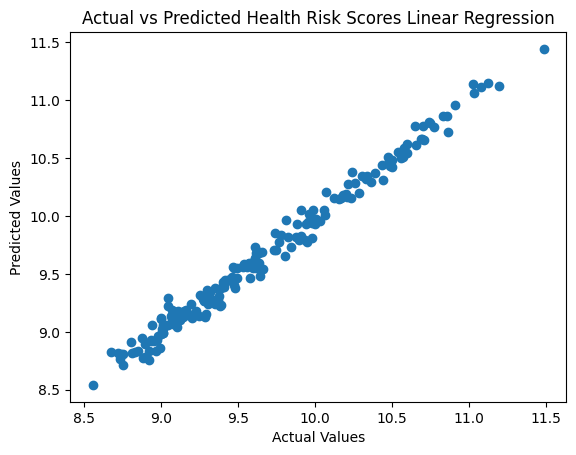

Coefficients for Linear Regression:
                    Coefficient
tempmax            3.359579e-02
tempmin           -3.085451e-02
temp               7.163160e-03
feelslikemax       3.041153e-02
feelslikemin       4.413399e-02
...                         ...
sunrise_Saturday   4.445541e+11
sunrise_Sunday     9.924499e+09
sunrise_Thursday  -3.983806e+10
sunrise_Tuesday    4.461638e+11
sunrise_Wednesday  2.345353e+11

[341 rows x 1 columns]
Decision Tree:
Mean Squared Error: 0.020020515275855962
R sqaured: 0.9496870772217526
Cross-Validation R-squared Scores: [0.94415719 0.95010949 0.9133076  0.92891567 0.9352532 ]
Average R-squared Score: 0.9343486311385123
----------------------------------------
Training Mean Squared Error: 0.0
Training R squared: 1.0
----------------------------------------


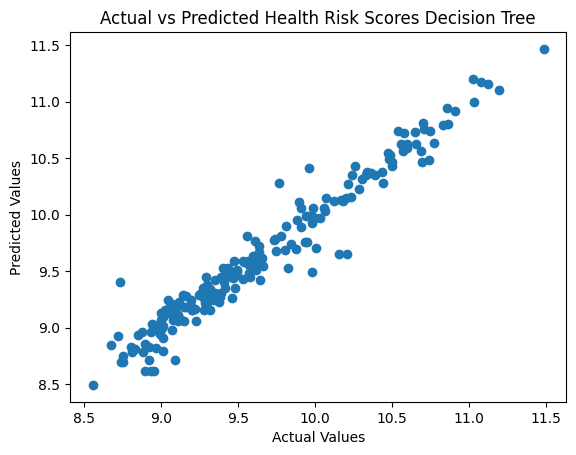

Feature Importance for Decision Tree:
                   Importance
tempmax              0.042038
tempmin              0.001039
temp                 0.002084
feelslikemax         0.010410
feelslikemin         0.000514
...                       ...
sunrise_Saturday     0.000002
sunrise_Sunday       0.004745
sunrise_Thursday     0.000086
sunrise_Tuesday      0.000005
sunrise_Wednesday    0.000244

[341 rows x 1 columns]
Random Forest:
Mean Squared Error: 0.011744490167702905
R sqaured: 0.9704852937731264
Cross-Validation R-squared Scores: [0.95852261 0.97907809 0.96550275 0.98066406 0.96809084]
Average R-squared Score: 0.9703716717017501
----------------------------------------
Training Mean Squared Error: 0.0016198978957355156
Training R squared: 0.996593406897459
----------------------------------------


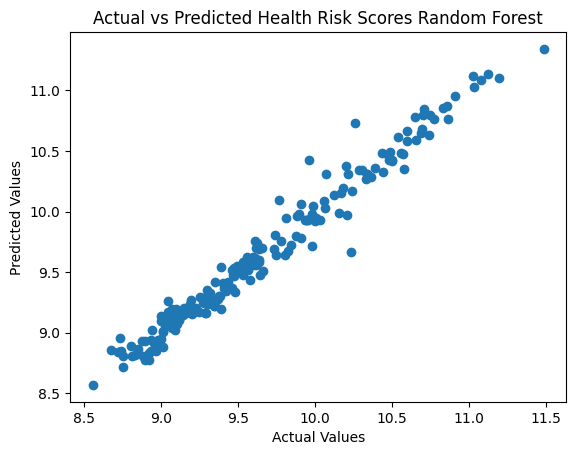

Feature Importance for Random Forest:
                   Importance
tempmax              0.047357
tempmin              0.003488
temp                 0.003082
feelslikemax         0.008214
feelslikemin         0.003824
...                       ...
sunrise_Saturday     0.000123
sunrise_Sunday       0.000844
sunrise_Thursday     0.000097
sunrise_Tuesday      0.000293
sunrise_Wednesday    0.000169

[341 rows x 1 columns]


In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Preprocessing Data
data = pd.read_csv('/Users/emmettralston/Air_and_Health_Impacts/Data/Air_Health.csv')
data = pd.get_dummies(data, 'sunrise', columns=['sunrise', 'sunset', 'conditions', 'City', 'Season', 'Day_of_Week'])
data['Is_Weekend'] = data['Is_Weekend'].astype(float)
data['Month'] = data['Month'].astype(float)

#Data Splitting
x = data.drop('Health_Risk_Score', axis=1)
y = data['Health_Risk_Score']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#Feature Scaling 
s = StandardScaler()
x_train_s = s.fit_transform(x_train)
x_test_s = s.transform(x_test)

# Initialize Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

#Model Eval
for name, model in models.items():
    model.fit(x_train_s, y_train)
    y_pre = model.predict(x_test_s)
    mse =mean_squared_error(y_test, y_pre)
    r2 = r2_score(y_test, y_pre)
    scores = cross_val_score(model, x_train_s, y_train, cv = 5, scoring ='r2')
    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R sqaured: {r2}')
    print(f'Cross-Validation R-squared Scores: {scores}')
    print(f'Average R-squared Score: {np.mean(scores)}')
    print("-" * 40)
    
    #Checking Overfitting
    y_train_pre = model.predict(x_train_s)  
    train_mse = mean_squared_error(y_train, y_train_pre)  
    train_r2 = r2_score(y_train, y_train_pre)

    print(f"Training Mean Squared Error: {train_mse}")
    print(f"Training R squared: {train_r2}")
    print("-" * 40)

    #Plotting
    plt.scatter(y_test, y_pre)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Health Risk Scores {name}')
    plt.show()
    plt.close()

    #Coefficients/Feature Importance
    if hasattr(model, 'coef_'):
        coefficients = pd.DataFrame(model.coef_, index=x.columns, columns = ['Coefficient'])
        print(f'Coefficients for {name}:')
        print(coefficients)
    elif hasattr(model, 'feature_importances_'):
        importances = pd.DataFrame(model.feature_importances_, index=x.columns, columns = ['Importance'])
        print(f'Feature Importance for {name}:')
        print(importances)
        
        
        
    

